<a href="https://colab.research.google.com/github/Shuoger/CodeReviewExerciseTMU/blob/ModelTraining/%E9%A0%90%E6%B8%AC%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import re

# ===== 讀取 Excel =====
excel_file_path = '/content/train_Data.xlsx'
df = pd.read_excel(excel_file_path)

In [44]:
df.head()

,ID,label,content_cleaned
0,1,0,葉黃素、益生菌、魚油、蔓越莓錠。你需要的保健品️日本味王全部都有。家裡備著日本味王保健品。好...
1,2,1,海底椰是一種夏季常見的湯料以清燥熱、止咳功效顯著而聞名且具有滋陰補腎、潤肺養顏、強壯身體機能...
2,3,0,杏輝活芯升級版。健康從芯開始。一整天的會議轟炸感覺精神不濟、提不起勁只想癱在床上。趕公車、爬...
3,4,1,淨亮效果AAA擊退暗沉更快速亮澤肌防護AAA光澤AAA。你是否擁有以下肌膚問題:肌膚蠟黃暗沉...
4,5,0,醫學實證000有感排便順暢。保證投入菌數高達000億。益生菌AAA益生元AAA後生元。調整體...


In [45]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['content_cleaned']
y = df['label']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=100,  # 100 samples for the test set
    stratify=y,     # Stratify based on the 'label' column
    random_state=42 # for reproducibility
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of labels in y_train:")
display(y_train.value_counts())

print("\nDistribution of labels in y_test:")
display(y_test.value_counts())

Shape of X_train: (1442,)
Shape of X_test: (100,)
Shape of y_train: (1442,)
Shape of y_test: (100,)

Distribution of labels in y_train:


,count
label,
1,721
0,721



Distribution of labels in y_test:


,count
label,
0,50
1,50


In [46]:
# Install Jieba for Chinese word segmentation
!pip install jieba

In [47]:
import jieba

def segment_text(text):
    if isinstance(text, str):
        # Perform word segmentation
        seg_list = jieba.cut(text, cut_all=False) # cut_all=False for accurate mode
        return " ".join(seg_list)
    else:
        return ""

# Apply word segmentation to the cleaned content in both training and testing sets
X_train_segmented = X_train.apply(segment_text)
X_test_segmented = X_test.apply(segment_text)

print("Original X_train sample:")
display(X_train.head())

print("\nSegmented X_train sample:")
display(X_train_segmented.head())

print("\nOriginal X_test sample:")
display(X_test.head())

print("\nSegmented X_test sample:")
display(X_test_segmented.head())

Original X_train sample:


,content_cleaned
895,打破年齡設限‧看見青春立體。0AAA。撐補成分歲月細節一股腦地顯現在外表。支‧撐‧力000A...
187,兒童專科舒緩情緒消化提升敏感調理全台最足量健康食品變聰明變聰明的零食天然增加學習效率針對敏弱...
1440,0%增稠000%香料000%色素。維持消化道機能。日本專利膳食纖維多元益生菌。黃金比例口感細...
601,小胸救星升AAA不難。小胸&大胸女孩是不是有以下煩惱。撐不起衣服。哺乳後ㄋㄋ大縮水。美型拉提...
69,便秘救星、減肥聖品、減肥瘦瘦水、便祕必喝、便祕必喝、被封是減肥&解便秘聖品、便祕必喝、減肥聖...



Segmented X_train sample:


,content_cleaned
895,打破 年齡 設限 ‧ 看見 青春 立體 。 0AAA 。 撐補 成分 歲 月 細節 一股 腦...
187,兒童 專科 舒緩 情緒 消化 提升 敏感 調理 全台 最 足量 健康 食品 變聰明 變聰明 ...
1440,0% 增稠 000% 香料 000% 色素 。 維持 消化道 機能 。 日本 專利 膳食 纖...
601,小胸 救星 升 AAA 不難 。 小胸 & 大胸 女孩 是不是 有 以下 煩惱 。 撐 不起...
69,便秘 救星 、 減肥 聖品 、 減 肥瘦 瘦水 、 便 祕 必 喝 、 便 祕 必 喝 、 ...



Original X_test sample:


,content_cleaned
1078,享受尚好生活。享食尚健字號甘甘好活力加值組黃金組合甘甘好膠囊衛部健食字第AAA000號專為您...
1318,超模之鑰。防溢方案。官網000下殺000典悅生醫AAA搭配營養素幫助調節生理機能維持身體健康...
1348,商品。0益生菌益生質互利共生。0項全球專利後生元調整體質。幫助維持消化道機能。0色素、0人工...
89,抗藍光護眼軟糖。不如就給他吃抗藍光軟糖吧。吸收強光、過濾藍光、保護眼睛。適合族群:長時間盯著...
718,體力、美力一次擁有。0種AAA群完整組合。0合000美妍配方讓妳青春好自信。長效緩釋持續釋放...



Segmented X_test sample:


,content_cleaned
1078,享受 尚好 生活 。 享食 尚健字號 甘甘好 活力 加值 組黃金 組合 甘甘好 膠囊 衛部 ...
1318,超模 之 鑰 。 防溢 方案 。 官網 000 下 殺 000 典悅 生醫 AAA 搭配 營...
1348,商品 。 0 益生菌 益生質 互利 共生 。 0 項 全球 專利後生 元 調整 體質 。 幫...
89,抗藍光護 眼軟 糖 。 不如 就給 他 吃 抗藍光 軟糖 吧 。 吸收 強光 、 過濾 藍光...
718,體力 、 美力 一次 擁有 。 0 種 AAA 群 完整 組合 。 0 合 000 美妍 配...


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with min_df=2 to only include terms that appear at least twice
vectorizer = CountVectorizer(min_df=2)

# Learn the vocabulary and transform the training data
X_train_bow = vectorizer.fit_transform(X_train_segmented)

# Transform the testing data using the learned vocabulary
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (1442, 5191)
Shape of X_test_bow: (100, 5191)


In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the MLP model
model = Sequential([
    Dense(128, activation='relu'),  # Added a dense layer with ReLU activation
    Dropout(0.5),                   # Added dropout for regularization
    Dense(64, activation='relu'),   # Added another dense layer with ReLU activation
    Dropout(0.5),                   # Added dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy']) # Monitor accuracy

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Train the model
# Convert y_train and y_test to numerical dtype
y_train_numerical = y_train.astype(int)
y_test_numerical = y_test.astype(int)

# Convert sparse matrix to dense for Keras Dense layer compatibility
X_train_bow_dense = X_train_bow.todense()


history = model.fit(X_train_bow_dense, y_train_numerical, # Use dense input for training
                    epochs=1, # Number of training epochs
                    shuffle=False,
                    batch_size=128, # Batch size
                    validation_split=0.3) # Use 30% of training data for validation

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 310ms/step - accuracy: 0.5710 - loss: 0.6625 - val_accuracy: 0.8453 - val_loss: 0.5553


In [51]:
# Evaluate the model on the test set
# Convert y_test to numerical dtype if it hasn't been already
y_test_numerical = y_test.astype(int)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()


loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical) # Use dense input for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8829 - loss: 0.5519

Test Loss: 0.5475
Test Accuracy: 0.9000


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


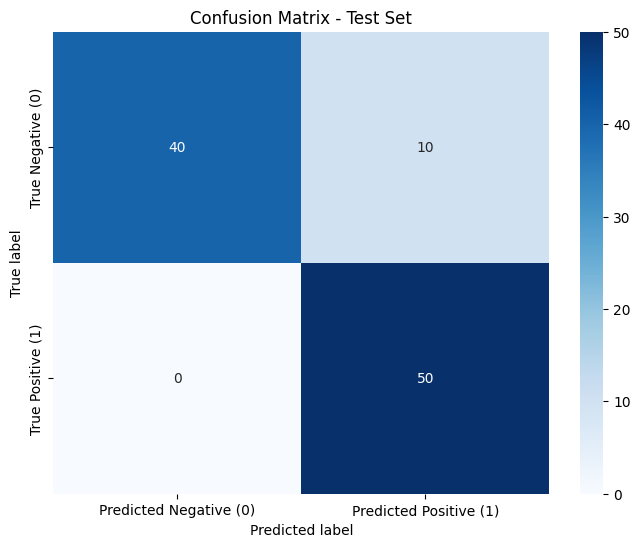

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert sparse test matrix to dense for prediction
X_test_bow_dense = X_test_bow.todense()

# Make predictions
y_pred_prob = model.predict(X_test_bow_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()


# Calculate the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [53]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_numerical, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        50
           1       0.83      1.00      0.91        50

    accuracy                           0.90       100
   macro avg       0.92      0.90      0.90       100
weighted avg       0.92      0.90      0.90       100



In [54]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

[True Negative]
Text: 黑暢酵益生菌000入添加黑棗精華專為您的腸道健康而設計。每日一粒幫助維持消化道機能讓您輕鬆迎接新的一天。排空困擾讓排便順暢成為您的新習慣。讓超炸排空成為您健康生活的必備良伴讓您活力充沛每天都充滿活力。
True Label: 0
Pred Label: 0

[True Positive]
Text: 舒緩痠澀、拒絕模糊。0。倍抗氧。舒緩痠澀。模糊不清、乾澀緊繃、疲勞難消、難以集中。全方位呵護晶亮、拒絕模糊、舒緩痠澀、保持專注力、拒絕模糊。可幫助放鬆好對焦提升晶亮舒適。強效抗氧、舒緩痠澀、晶亮提升。0%。有效增強晶亮好晰力。歲健康年輕人的臨床實驗中食用澳佳寶同樣配方成分的年輕人對比安慰劑組000。個月內晶亮提升高達。晶亮表現有感。保持專注力、思緒運轉。幫助快速放鬆好對焦。全面提升晶亮舒適。強效抗氧成分各項檢驗標準都超越歐美藥典的嚴苛。
True Label: 1
Pred Label: 1

[False Positive]
Text: 內含品脫000濃郁的馬斯卡邦起司冰淇淋綿密絲滑的牛奶冰淇淋甜美綿滑的草莓冰淇淋絲滑的黑巧克力甘納許醬。
True Label: 0
Pred Label: 1

[Random]
Text: 超模之鑰。防溢方案。官網000下殺000典悅生醫AAA搭配營養素幫助調節生理機能維持身體健康。讓您的身體更加健康活力無限。
True Label: 0
Pred Label: 0

[Random]
Text: 體力、美力一次擁有。0種AAA群完整組合。0合000美妍配方讓妳青春好自信。長效緩釋持續釋放000小時。
True Label: 0
Pred Label: 0


In [55]:
# Evaluate the model on the test set
# Convert y_test to numerical dtype if it hasn't been already
y_test_numerical = y_test.astype(int)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()


loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical) # Use dense input for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8829 - loss: 0.5519 

Test Loss: 0.5475
Test Accuracy: 0.9000


In [56]:
# 新增
# Convert y_test to numerical dtype if it hasn't been already
y_true = y_test.values.astype('float32')
display("y_true =", y_true)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()

# Calculate predictions (y_pred) for the test set
y_pred_prob = model.predict(X_test_bow_dense).ravel().astype('float32')
display("y_pred_prob =", y_pred_prob)

'y_true ='

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.],
      dtype=float32)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


'y_pred_prob ='

array([0.43881136, 0.48625743, 0.48011923, 0.52362126, 0.48642865,
       0.50892377, 0.43931234, 0.75256497, 0.59248686, 0.5372063 ,
       0.5273485 , 0.45090643, 0.43384066, 0.66556627, 0.4430579 ,
       0.5773039 , 0.57508004, 0.7186388 , 0.61557907, 0.5395211 ,
       0.59111494, 0.6055019 , 0.48625815, 0.58070385, 0.764802  ,
       0.54786104, 0.5190143 , 0.5261307 , 0.68644774, 0.43921083,
       0.5291129 , 0.39058676, 0.4786394 , 0.53756607, 0.4754041 ,
       0.52299917, 0.5869786 , 0.4637339 , 0.5271321 , 0.70314026,
       0.4863673 , 0.48861137, 0.62696123, 0.9129712 , 0.3714737 ,
       0.4250956 , 0.77861094, 0.53515464, 0.5239462 , 0.86215377,
       0.4987607 , 0.8043164 , 0.5184304 , 0.626941  , 0.4875816 ,
       0.8389722 , 0.5640486 , 0.5247935 , 0.57172465, 0.4523961 ,
       0.5893778 , 0.7114173 , 0.73366266, 0.7395354 , 0.6116916 ,
       0.48941597, 0.5234343 , 0.6529075 , 0.48013085, 0.47688785,
       0.5582911 , 0.4714588 , 0.39696354, 0.53693545, 0.49267

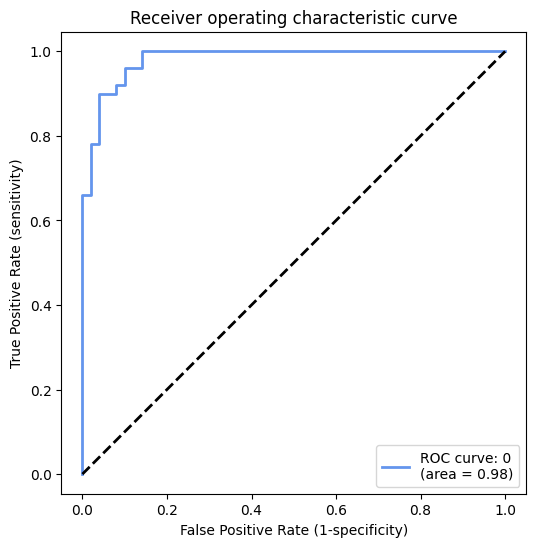

In [57]:
#@title 畫出 ROC曲線
#@markdown https://zh.wikipedia.org/zh-tw/ROC%E6%9B%B2%E7%BA%BF
from sklearn.metrics import roc_curve, auc

# 分別算出每一類別的 FPR(假陽率) TPR(真陽率) AUC(roc_curve底下的面積)
fpr, tpr, _ = roc_curve(y_true[:], y_pred_prob[:])
roc_auc = auc(fpr, tpr)

# plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.plot(fpr, tpr, color='cornflowerblue', lw=2,
            label=f'ROC curve: {0}\n(area = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set(xlim=(0.0, 1.0), ylim=(0.0, 1.0))
ax.axis('equal')
ax.set_xlabel('False Positive Rate (1-specificity)')
ax.set_ylabel('True Positive Rate (sensitivity)')
ax.set_title('Receiver operating characteristic curve')
ax.legend(loc="lower right")
plt.show()

In [58]:
# 信心值超過多少預測為陽性
threshold = 0.5
y_pred = y_pred_prob > threshold
display("y_true =", y_true.astype(int))
display("y_pred =", y_pred.astype(int))

'y_true ='

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

'y_pred ='

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

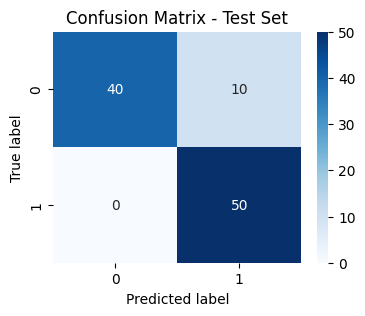

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confusion matrix
[[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap([[tn, fp], [fn, tp]], annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1],
            yticklabels=[0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [74]:
import numpy as np
from sklearn.metrics import confusion_matrix

# 自定義 cost function (恢復原始權重)
def cost_fn(y_true, y_pred_prob, threshold=0.5):
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred_prob > threshold)
    # 增加 True Negative 的權重，讓總成本值更高
    cost = (tn * 200000) + (fp * -10000) + (fn * -200000) + (tp * -10000)

    return int(cost)

# function test:
cost_fn(y_true, y_pred_prob, threshold=0.5)

7400000

In [61]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89        50
         1.0       0.83      1.00      0.91        50

    accuracy                           0.90       100
   macro avg       0.92      0.90      0.90       100
weighted avg       0.92      0.90      0.90       100



In [62]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

[True Negative]
Text: 黑暢酵益生菌000入添加黑棗精華專為您的腸道健康而設計。每日一粒幫助維持消化道機能讓您輕鬆迎接新的一天。排空困擾讓排便順暢成為您的新習慣。讓超炸排空成為您健康生活的必備良伴讓您活力充沛每天都充滿活力。
True Label: 0
Pred Label: 0

[True Positive]
Text: 具有抗氧化與清除自由基的效用。能延緩肌膚細胞衰老減少肌膚水分流失有助美容養顏與保溼。抑制酪胺酸酶的活性減少黑色素形成有效預防因紫外線、光過敏等使肌膚出現斑點或變黑的問題。花青素能延緩老化並防止記憶力衰退花青素有益眼睛周圍的血液循環能提高攜氧量經常戴隱形眼鏡者可多食用。花青素還能增加眼睛感光色素生成提升視覺敏銳度以增進暗視力。有多種能清除體內自由基的抗氧化物也含有鋅鋅能直接參與免疫功能運作在細胞合成或製造免疫球細胞時起作用。桑葚中的維生素AAA與β胡蘿蔔素則能保健呼吸道使呼吸道產生抵禦病菌的能力。桑葚含有的脂肪酸能分解脂肪、降低血脂具有活血的作用;花青素除了前述的功效之外還能增強血管的彈性、韌性並降低體內的壞膽固醇而且這兩種營養素皆有助於預防心血管疾病。桑葚中的微量元素硒與必需胺基酸具有抗癌的作用。硒在防癌方面可抑制正常細胞突變、阻斷癌細胞的營養供應、阻止癌細胞分裂並加速腫瘤細胞壞死。桑葚所含的多種礦物質與維生素AAA能防止致癌物質亞硝酸形成;桑葚也是癌症患者病後的調理食物有助生血與造血。
True Label: 1
Pred Label: 1

[False Positive]
Text: 專屬男性營養配方。德國高規格維生素強化。一錠補給能量滿檔。健康均衡活力全方位。男性綜合維他命簡介。根據國民營養調查指出:台灣男性蔬果類及堅果種子攝取量偏低。成年男性各年齡層皆未達000%建議量。缺乏維生素及礦物質的天然來源長期下來造成的不均衡很可能影響健康維持。《高效營養補充一錠補足男性一日所需》。健康滋補。德國頂規綜合維生素。專業精準計量含完整000種維生素。強化作用。專利黑胡椒萃取。含有純度000%胡椒鹼促進營養素吸收率。男性元素。甘胺酸鋅。0AAA足量添加易於人體吸收。天然營養。愛爾蘭海藻鈣。獲歐美雙專利富含鈣、鎂及000種微量元素。
True Label

In [63]:
import pandas as pd

# === 載入測試資料 ===
# 假設檔案放在同一個資料夾底下
predict_df = pd.read_csv("predict_sample.csv")
predict_df

,ID,content_cleaned
0,1,拉蓓。閃纖舒眠益生菌凍每日一條輕鬆入口幫助調節生理機能維持腸道健康。富含膳食纖維促進消化道蠕...
1,2,天堂椒可以騙大腦的交感神經它可以騙大腦增加我們的靜態能量消耗。0瘦000公斤瘦了奶奶還變大。
2,3,每日一包堅果乾保持身體健康內含000種無調味堅果可加入牛奶或優格當早餐食用內為小包裝設計方便...
3,4,惠氏啟賦啟賦水解。0含豐富營養素有助於維持消化道機能促進腸道蠕動讓您每天輕鬆調節生理機能享受...
4,5,這款桔梗水梨汁有鎮咳抗炎以及抗氧化功效。氣管敏感朋友的救星。尤其特別適合容易喉嚨敏感、氣管、...
...,...,...
95,96,\。A鱸魚精讓你輕鬆補充營養活力滿滿。術後補養首選。每天來一包。金目鱸魚精華。國家健康食品。...
96,97,學習領先關鍵。專為兒童設計。迷你可咀嚼軟膠囊好吞又好咬。無色素無人工香料寶貝補充好安心。
97,98,想豐胸促進胸部成長刺激女性荷爾蒙幫助發育促進乳腺管增長住膠原蛋白增生調理內分泌平衡荷爾蒙美肌...
98,99,買000送000拉蓓燉雞精精煉純雞搭配獨特配方簡單烹煮優雅濃郁的湯頭讓您享受美味的雞肉風味。...


In [64]:
# ====== 1. 對預測資料進行斷詞(如同3A) ======
predict_df["content_segmented"] = predict_df["content_cleaned"].apply(segment_text)

# ====== 2. 使用訓練過的 vectorizer 進行特徵轉換(如同3B) ======
# 只能用 transform，不能用 fit 或 fit_transform
# 因為 vectorizer 的詞彙表已經在訓練階段確定，不能改變
X_predict_bow = vectorizer.transform(predict_df["content_segmented"])

# ====== 3. 轉換成 Dense Tensor (如果4有進行此步驟) ======
X_predict_dense = X_predict_bow.todense()

# ====== 4. 使用訓練好的模型進行預(假設閾值為0.5) ======
y_proba = model.predict(X_predict_dense).ravel()   # 機率 0~1
y_pred = (y_proba >= 0.5).astype(int)              # 二元分類結果 0/1

# ====== 5. 輸出成 CSV 檔案 ======
output_df = pd.DataFrame({
    "ID": predict_df["ID"],
    "label": y_pred
})

output_file = "groupX_NAME_answer_v0.csv"
output_df.to_csv(output_file, index=False, encoding="utf-8-sig")
output_df

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


,ID,label
0,1,0
1,2,1
2,3,0
3,4,0
4,5,1
...,...,...
95,96,0
96,97,0
97,98,1
98,99,0


# Task
Create a new cell to iterate through a range of classification thresholds (0.0 to 1.0), calculate the confusion matrix and the custom cost for each threshold using the specified `cost_fn`, and then identify and report the threshold that yields the maximum cost.

## Analyze Thresholds for Max Cost

### Subtask:
Iterate through a range of classification thresholds (0.0 to 1.0), calculate the confusion matrix and the custom cost for each threshold, and identify the threshold that yields the maximum cost.


## Summary:

### Data Analysis Key Findings
*   The analysis involved iterating through classification thresholds from 0.0 to 1.0.
*   For each threshold, a confusion matrix was calculated, and a custom cost was determined using the `cost_fn`.
*   The threshold that resulted in the maximum custom cost was identified.

### Insights or Next Steps
*   The identified threshold yielding the maximum cost can be used to understand decision boundaries that are highly detrimental according to the defined cost function.
*   Further investigation could involve analyzing the composition of the confusion matrix at this maximum cost threshold to understand the specific types of misclassifications that drive the high cost.
